In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

In [2]:
data = pd.read_csv('hp.csv')

In [3]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


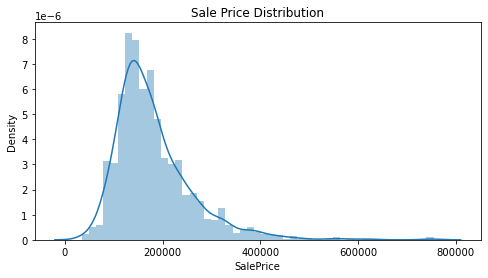

In [8]:
plt.figure(figsize=(8, 4))
sns.distplot(data['SalePrice']);
plt.title("Sale Price Distribution");

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


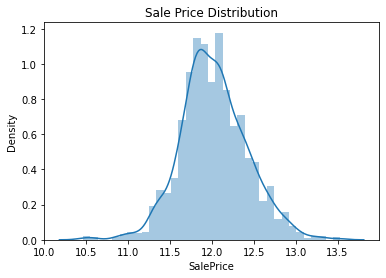

In [9]:
data['SalePrice'] = np.log(data['SalePrice']+1)
sns.distplot(data['SalePrice'])
plt.title("Sale Price Distribution");

In [10]:
data.drop('Id',axis=1,inplace=True)

In [11]:
corr_matrix = data.corr()

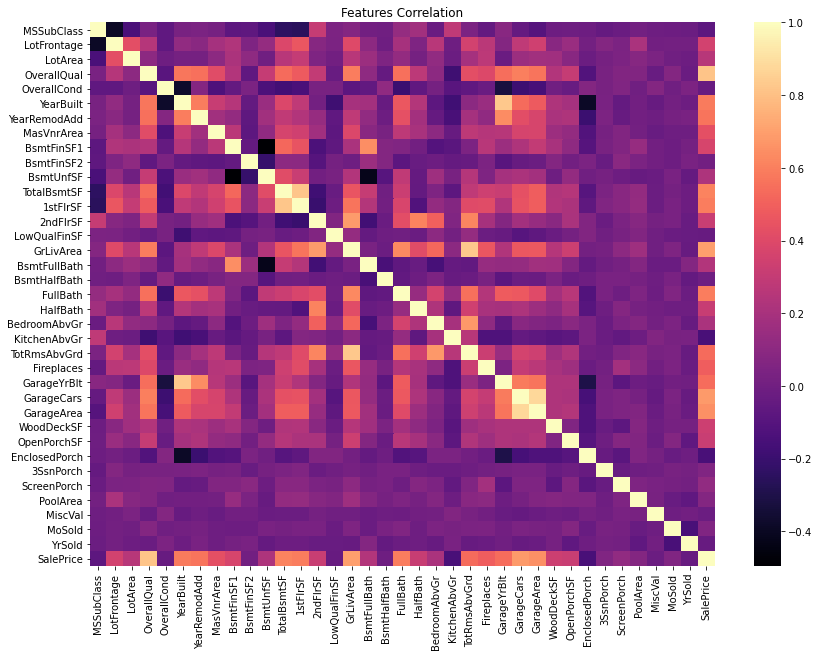

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix,cmap='magma')
plt.title("Features Correlation",);

In [14]:
high_corr = corr_matrix['SalePrice'].nlargest(10)
high_corr

SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
Name: SalePrice, dtype: float64

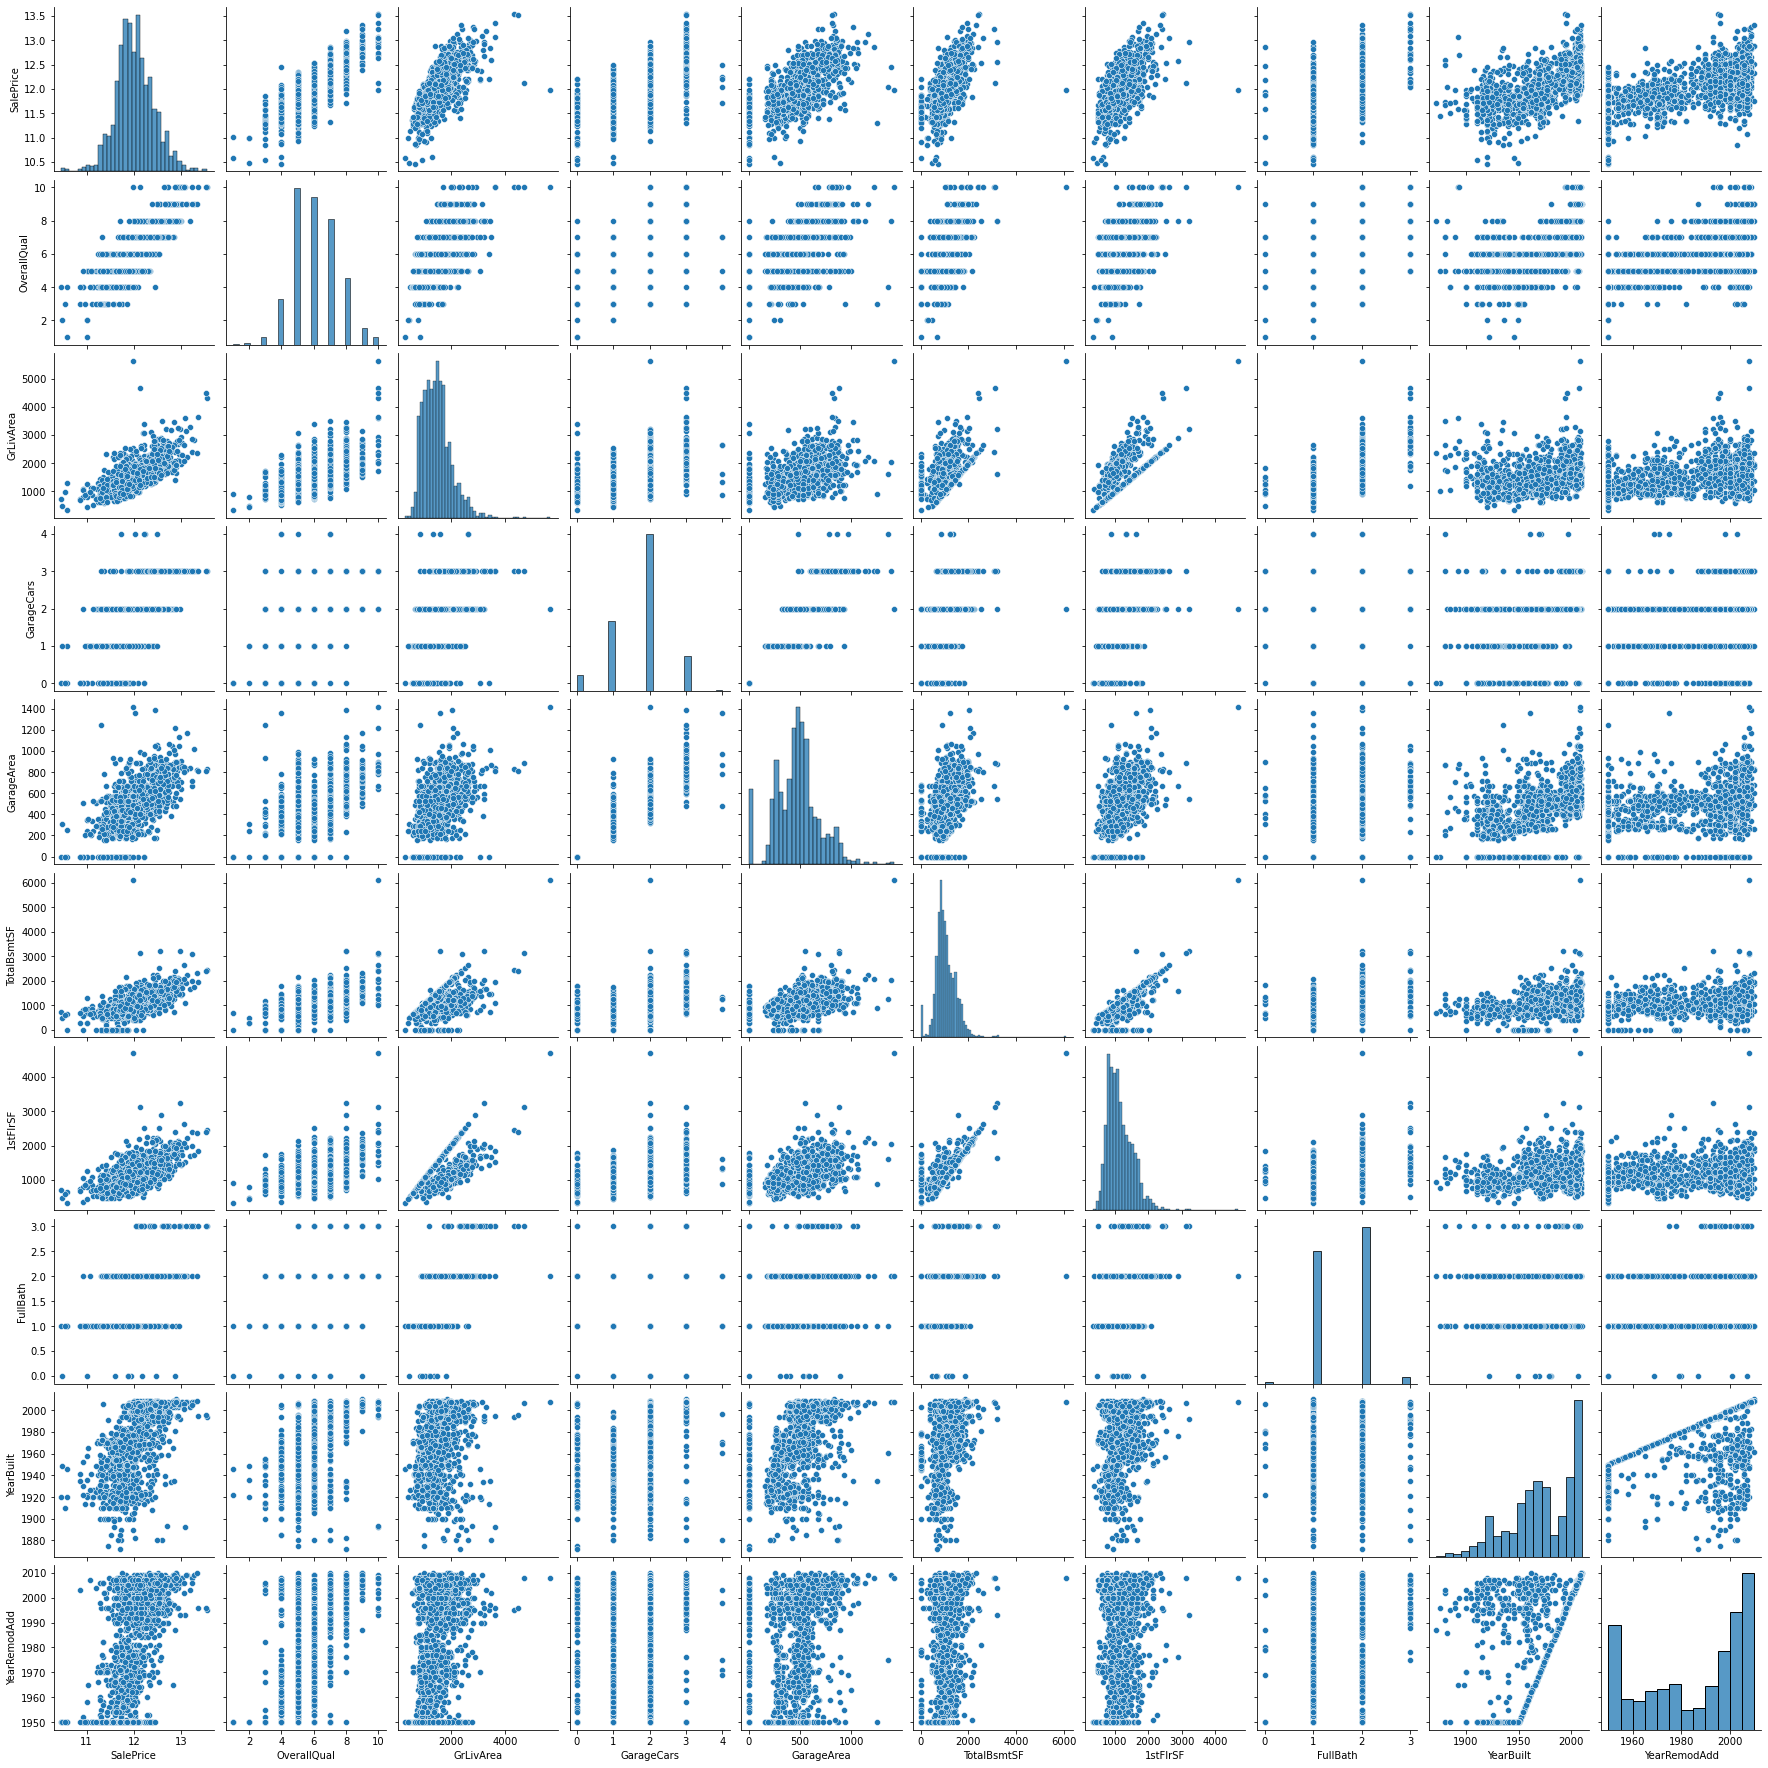

In [15]:
sns.pairplot(data[high_corr.index])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


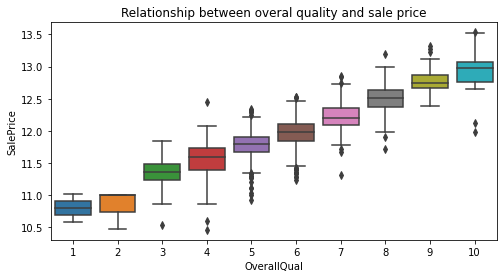

In [16]:
plt.figure(figsize=(8,4))
sns.boxplot(data['OverallQual'], data['SalePrice']);
plt.title("Relationship between overal quality and sale price");

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


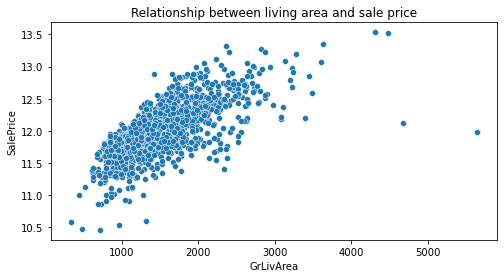

In [17]:
plt.figure(figsize=(8,4))
sns.scatterplot(data['GrLivArea'], data['SalePrice']);
plt.title("Relationship between living area and sale price");

In [18]:
data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<13)].index, inplace=True)

In [19]:
data.reset_index(drop = True, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


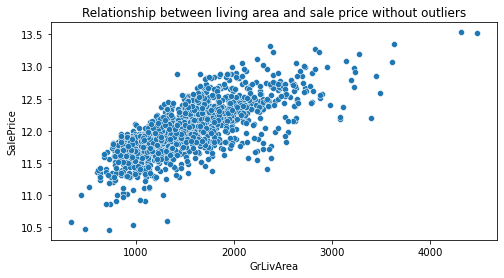

In [20]:
plt.figure(figsize=(8,4))
sns.scatterplot(data['GrLivArea'], data['SalePrice']);
plt.title("Relationship between living area and sale price without outliers");

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


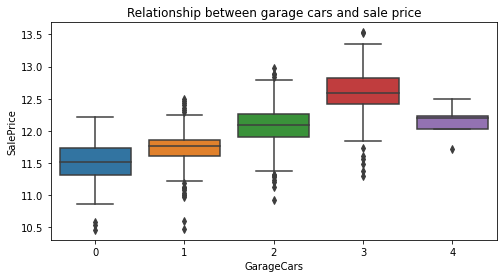

In [21]:
plt.figure(figsize=(8,4))
sns.boxplot(data['GarageCars'], data['SalePrice']);
plt.title("Relationship between garage cars and sale price");

In [22]:
X = data.drop(['SalePrice'],axis=1)
y = data['SalePrice']

In [23]:
feature_error =['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','Alley','FireplaceQu','PoolQC','Fence','MiscFeature']

In [24]:
feature_error

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'Alley',
 'FireplaceQu',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [25]:
for col in feature_error :
    print(X[col].unique())
    print('\n')

['Gd' 'TA' 'Ex' nan 'Fa']


['TA' 'Gd' nan 'Fa' 'Po']


['No' 'Gd' 'Mn' 'Av' nan]


['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']


['RFn' 'Unf' 'Fin' nan]


['TA' 'Fa' 'Gd' nan 'Ex' 'Po']


['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


[nan 'Grvl' 'Pave']


[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


[nan 'Ex' 'Fa' 'Gd']


[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


[nan 'Shed' 'Gar2' 'Othr' 'TenC']




In [26]:
X[feature_error] = X[feature_error].fillna('NA')

In [27]:
feature_num = list(X.select_dtypes(['int64','float64']).columns)

In [28]:
feature_num

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [29]:
feature_cat = list(X.select_dtypes(['object']).columns)

In [30]:
feature_cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [31]:
# Pipeline for numeric features
num_pipeline = Pipeline([
        # Imputing missing value with median
        ('imputer', SimpleImputer(strategy="median")),
        # Scaling the values
        ('rb_scaler', RobustScaler()),
    ])

In [32]:
# Pipeline for categorical features
cat_pipeline = Pipeline([
        # Imputing missing value with mode
        ('imputer', SimpleImputer(strategy="most_frequent")),
        # Transform to numeric
        ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ])

In [33]:
# Full pipeline for preprocessing
preprocess_pipeline = ColumnTransformer(transformers=[ 
        ('num', num_pipeline, feature_num),
        ('cat', cat_pipeline, feature_cat),
    ])


In [34]:
# Linear Regression
linreg = Pipeline([
    ('preprocess',preprocess_pipeline),
    ('reg',LinearRegression())
])

In [35]:
# Lasso
lasso = Pipeline([
    ('preprocess',preprocess_pipeline),
    ('reg',Lasso(alpha=0.0005))
])

In [36]:
# Ridge
ridge = Pipeline([
    ('preprocess',preprocess_pipeline),
    ('reg',Ridge(alpha=30))
])

In [37]:
# Random Forest Regressor
rf = Pipeline([
    ('preprocess',preprocess_pipeline),
    ('reg',RandomForestRegressor(max_features = 'sqrt', n_estimators = 600))
])

In [38]:
# Gradient Boosting Regressor
gb = Pipeline([
    ('preprocess',preprocess_pipeline),
    ('reg',GradientBoostingRegressor(learning_rate = 0.01, n_estimators = 1750, max_depth = 3))
])

In [39]:
models = [linreg,lasso,ridge,rf,gb]
names = ['Linear Regression', 'Lasso', 'Ridge', 'Random Forest Regressor', 'Gradient Boosting Regressor']

In [40]:
def rmse(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [41]:
print('RMSE :')
for model, name in zip(models, names):
    score = rmse(model, X, y)
    print("- {}: Mean: {:.6f}, Std: {:4f}".format(name, score.mean(), score.std()))

RMSE :
- Linear Regression: Mean: 0.126515, Std: 0.010453
- Lasso: Mean: 0.112129, Std: 0.006625
- Ridge: Mean: 0.115839, Std: 0.004958
- Random Forest Regressor: Mean: 0.140844, Std: 0.008938
- Gradient Boosting Regressor: Mean: 0.119252, Std: 0.006464


In [42]:
lasso.fit(X,y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('rb_scaler',
                                                                   RobustScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                

In [48]:
final = pd.DataFrame()
final.to_csv('final.csv',index=False)
